In [1]:
using Pkg

In [2]:
Pkg.add("Roots")
Pkg.add("ForwardDiff")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %13.6 %Fetching: [==============>                          ]  33.9 %>                     ]  47.4 %Fetching: [======================>                  ]  54.4 %Fetching: [================================>        ]  77.6 %Fetching: [=====================================>   ]  90.9 %Fetching: [======================================>  ]  94.0 % Resolving package versions...
 Installed Tables ──────────── v0.1.12
 Installed CategoricalArrays ─ v0.5.1
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [324d7699] ↑ CategoricalArrays v0.5.0 ⇒ v0.5.1
  [bd369af6] ↑ Tables v0.1.11 ⇒ v0.1.12
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`


In [119]:
using Roots  
using Plots
using ForwardDiff

# 1. Test działania różnych metod dla wybranych funkcji

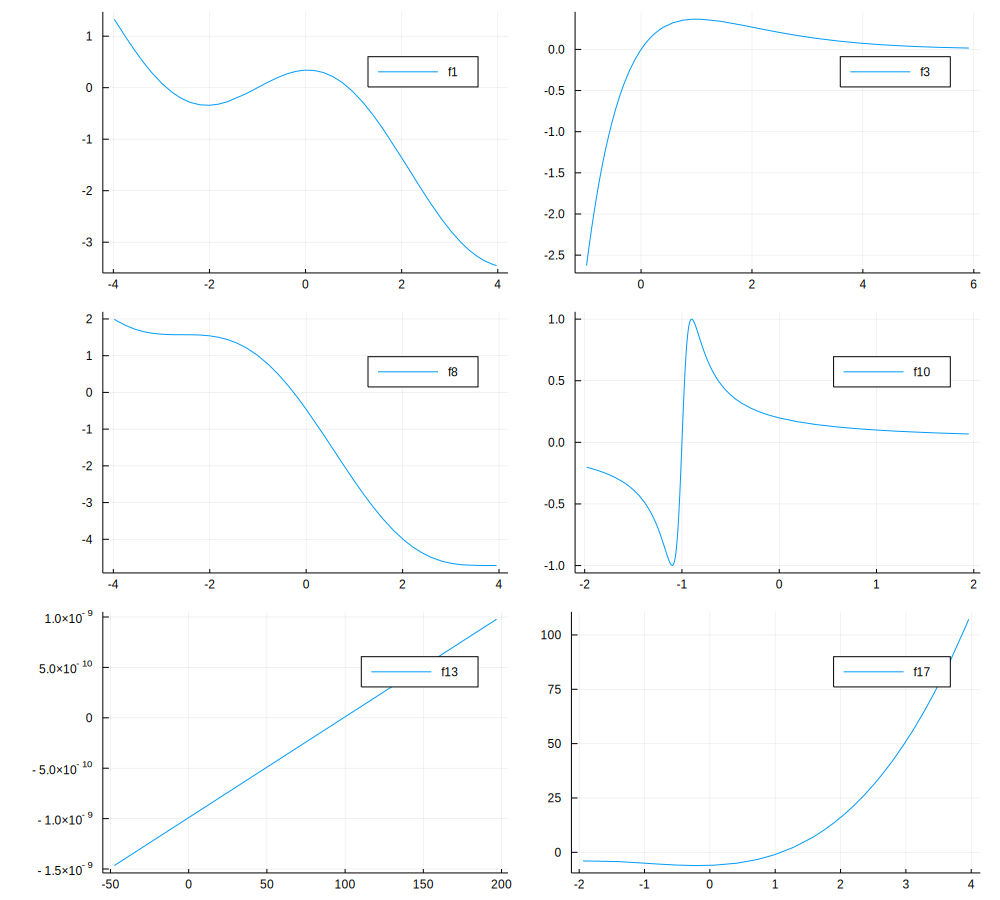

In [57]:
# http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html
# wybrane funkcje:

_f1(x) = sin(x) - x / 2
f1(x) = _f1(x + 1.0)
f1_range = (-4, 4)

f3(x) = x * exp(-x)
f3_range = (-1, 6)

f6(x) = exp(x) - 2 - 1 / (10 * x)^2 + 2 / (100 * x)^3
#f6(x) = _f6(x + 1.0)
f6_range = (-4, 3)

_f8(x) = cos(x) - x
f8(x) = _f8(x + 1.0)
f8_range = (-4, 4)

_f10(x) = 20.0 * x / (100.0 * x * x + 1.0)
f10(x) = _f10(x + 1.0)
f10_range = (-2, 2)

_f13(x) = 0.00000000001 * (x - 100.0)
f13(x) = _f13(x + 1.0)
f13_range = (-50, 200)

_f17(x) = x^3 - 2*x - 5
f17(x) = _f17(x + 1.0)
f17_range = (-2, 4)

p1 = plot(f1, f1_range[1], f1_range[2], label="f1")
p3 = plot(f3, f3_range[1], f3_range[2], label="f3")
#p6 = plot(f6, f6_range[1], f6_range[2], label="f6")
p8 = plot(f8, f8_range[1], f8_range[2], label="f8")
p10 = plot(f10, f10_range[1], f10_range[2], label="f10")
p13 = plot(f13, f13_range[1], f13_range[2], label="f13")
p17 = plot(f17, f17_range[1], f17_range[2], label="f17")

plot(p1, p3, p8, p10, p13, p17, layout=(3,2), size=(1000, 900))

In [58]:
using DataFrames
using CSV

┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1187


In [109]:
algorithms = [FalsePosition(), Roots.Newton(), Roots.Steffensen()]
functions = [f1, f3, f8, f10, f13, f17]
ranges = [(-4.5, -1.1), (-1.0, 4.0), (-4.0, 4.0), (-2.0, 10.0), (-50.0, 150.0), (-2.0, 4.0)]
starting_points = [-0.2, -1.0, -1.7, -1.02, 500.0, 4.0]
fnames = ["f1", "f3", "f8", "f10", "f13", "f17"]
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [110]:
results = DataFrame(
    name = String[],
    method = String[],
    x = Float32[],
    f_x = Float32[],
    sign_change = Bool[],
    is_zero = Bool[]
)

,name,method,x,f_x,sign_change,is_zero
,String,String,Float32,Float32,Bool,Bool


In [111]:
for test_set=zip(functions, ranges, starting_points, fnames)
    fun = test_set[1]
    range = test_set[2]
    starting_point = test_set[3]
    name = test_set[4]

    x = find_zero(fun, range, FalsePosition(), verbose=true)
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "falsi" x fun(x) sign_change iszero(fun(x))])
    
    x = find_zero((fun, D(fun)), starting_point, Roots.Newton(), verbose=true)    
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "newton" x fun(x) sign_change iszero(fun(x))])
    
    x = find_zero(fun, starting_point, Roots.Steffensen(), verbose=true) 
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "steffensen" x fun(x) sign_change iszero(fun(x))])
end

Results of univariate zero finding:

* Converged to: -2.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-4.5000000000000000, -1.1000000000000001)
(a_1, b_1) = (-4.5000000000000000, -2.7999999999999998)
(a_2, b_2) = (-2.7999999999999998, -2.9255409724929318)
(a_3, b_3) = (-2.9255409724929318, -2.8937563863899567)
(a_4, b_4) = (-2.9255409724929318, -2.8954646365086854)
(a_5, b_5) = (-2.8954646365086854, -2.8954942676428854)
(a_6, b_6) = (-2.8954942676428854, -2.8954942670339703)
(a_7, b_7) = (-2.8954942676428854, -2.8954942670339809)

Results of univariate zero finding:

* Converged to: -2.895494267033981
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.2000000000000000,	 fx_0 =  0.3173560908995228
x_1 = -1.8133465500631434,	 fx_1 = -0


* Converged to: -1.0
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0200000000000000,	 fx_0 = -0.3846153846153850
x_1 = -0.9983333333333333,	 fx_1 =  0.0333240766453771
x_2 = -1.0000009261831990,	 fx_2 = -0.0000185236639789
x_3 = -0.9999999999999999,	 fx_3 =  0.0000000000000022
x_4 = -1.0000000000000000,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -1.0
* Algorithm: Roots.Steffensen()
* iterations: 4
* function evaluations: 7
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0200000000000000,	 fx_0 = -0.3846153846153850
x_1 = -0.9983341112096208,	 fx_1 =  0.0333085320721878
x_2 = -1.0000608823342949,	 fx_2 = -0.0012176462345583
x_3 = -0.9999999837216763,	 fx_3 =  0.0000003255664738
x_4 = -1.0000000000000000,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: 98.994391877202

In [118]:
iters = [7, 7, 5, 41, 7, 8, 8, 7, 7, 1, 4, 4, 5, 1, 1, 11, 7, 9]
evals = [9, 15, 9, 43, 15, 12, 10, 15, 11, 3, 9, 7, 7, 3, 4, 13, 15, 13]
results[:iterations] = iters
results[:evaluations] = evals
#show(results, allrows=true, allcols=true)
results

,name,method,x,f_x,sign_change,is_zero,iterations,evaluations
,String,String,Float32,Float32,Bool,Bool,Int64,Int64
1,f1,falsi,-2.89549,0.0,false,true,7,9
2,f1,newton,-2.89549,0.0,false,true,7,15
3,f1,steffensen,-1.0,-1.11022e-16,false,false,5,9
4,f3,falsi,1.81899e-12,1.81899e-12,false,false,41,43
5,f3,newton,-8.81e-27,-8.81e-27,false,false,7,15
6,f3,steffensen,0.0,0.0,false,true,8,12
7,f8,falsi,-0.260915,0.0,false,true,8,10
8,f8,newton,-0.260915,1.11022e-16,false,false,7,15
9,f8,steffensen,-0.260915,0.0,false,true,7,11


# 2. Przykład trudnej funkcji

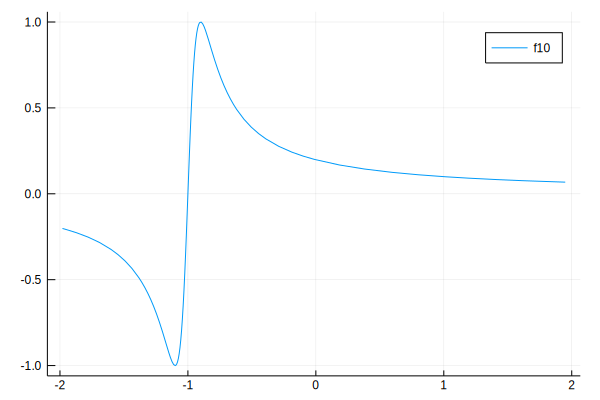

In [121]:
plot(p10)

In [146]:
falsi_result = find_zero(f10, (-100, 100), FalsePosition(), verbose=true)

Results of univariate zero finding:

* Converged to: -1.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 24
* function evaluations: 26
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-100.0000000000000000,  0.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000, -50.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000, -49.7967488105657452)
(a_3, b_3) = ( 0.0000000000000000, -49.3918721259526592)
(a_4, b_4) = ( 0.0000000000000000, -48.5886229304120150)
(a_5, b_5) = ( 0.0000000000000000, -47.0081463904126053)
(a_6, b_6) = ( 0.0000000000000000, -43.9512256353502764)
(a_7, b_7) = ( 0.0000000000000000, -38.2515390838770557)
(a_8, b_8) = ( 0.0000000000000000, -28.4692809708536174)
(a_9, b_9) = ( 0.0000000000000000, -14.7361272506181606)
(a_10, b_10) = ( 0.0000000000000000, -3.1173059782341461)
(a_11, b_11) = (-3.1173059782341461, -0.0632882238546215)
(a_12, b_12) = (-0.0632882238546215, -2.1746714058312762)
(a_13, b_13) = (-0.0632882238

-1.0

Szukanie pierwiastków z wykorzystaniem metody reguły falsi ma gwarantowaną zbieżność (przy spełnieniu założeń dotyczących ciągłości funkcji i znaków na krańcach przedziału), stąd metoda bezproblemowo radzi sobie z tego typu przykładami.

In [129]:
test_points = -1.1:0.01:-1.0

-1.1:0.01:-1.0

In [180]:
newton_results = [find_zero((f10, D(f10)), start_x, Roots.Newton()) for start_x in test_points]

11-element Array{Float64,1}:
 -1.125899906842635e14
  2.6337026043843374e7
  2.2478981826304518e7
  2.0936023036669612e7
 -1.770931431627799e7 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 

In [181]:
stef_results = [find_zero(f10, start_x, Roots.Steffensen()) for start_x in test_points]

11-element Array{Float64,1}:
  2.7042893504679464e7
  2.2265045583756417e7
  1.5779801699542217e7
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 
 -1.0                 

Zauważmy jednak, że dla metod korzystających z pochodnej (lub ją przybliżających), jeśli początkowy punkt dla przykładu funkcji f10 nie jest dobrany odpowiednio blisko pierwiastka, każda kolejna iteracja powoduje oddalenie od miejsca zerowego.

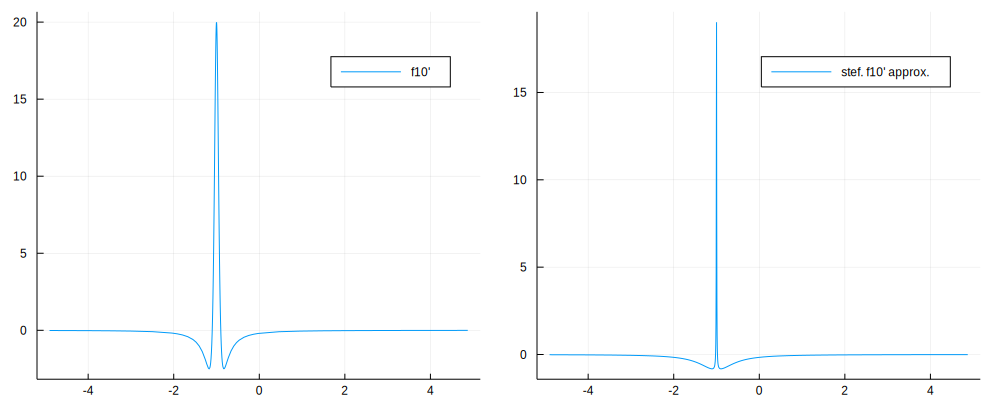

In [149]:
stef_approx(x) = (f10(x + f10(x)) - f10(x))/f10(x)
derp = plot(D(f10), label="f10'")
stefp = plot(stef_approx, label="stef. f10' approx.")
plot(derp, stefp, layout=(1, 2), size=(1000, 400))

# Niedziałające przykłady

In [154]:
# falsi: 1/x
# newton: f10
# steffen: f10

In [155]:
sigmoid(x) = 1.0 / (1.0 + exp(-x))

sigmoid (generic function with 1 method)

In [164]:
f_hard(x) = cos(x) + 10.0 * sigmoid(x) - 5.0

f_hard (generic function with 1 method)

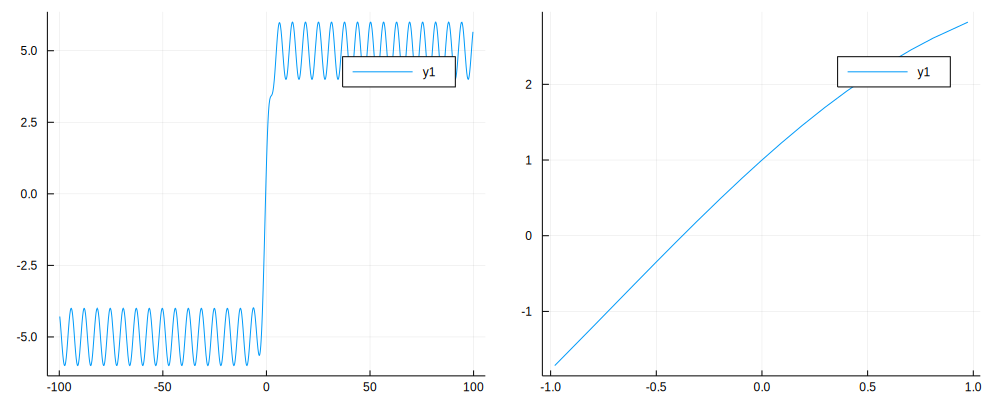

In [175]:
hard_global = plot(f_hard, -100, 100)
hard_local = plot(f_hard, -1, 1)
plot(hard_global, hard_local, layout=(1, 2), size=(1000, 400))

In [174]:
points2 = -20:1.0:20.0
newton2 = [find_zero((f_hard, D(f_hard)), start_x, Roots.Newton(), verbose=true) for start_x in points2]

Results of univariate zero finding:

* Converged to: -0.3763815134050628
* Algorithm: Roots.Newton()
* iterations: 41
* function evaluations: 83
* Note: Too many steps taken. Change of sign at xn identified. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
x_0 = -20.0000000000000000,	 fx_0 = -4.5919179175750715
x_1 = -14.9702155630431548,	 fx_1 = -5.7399822282339716
x_2 = -6.4365262157557019,	 fx_2 = -3.9957397012486950
x_3 =  17.2476712689670890,	 fx_3 =  4.9689163585391114
x_4 =  12.2763543613659145,	 fx_4 =  5.9581926214644216
x_5 = -8.5554376966765346,	 fx_5 = -5.6434060774285575
x_6 = -1.1864080349903805,	 fx_6 = -2.2859881509455739
x_7 = -0.3456455376904682,	 fx_7 =  0.0852445738795184
x_8 = -0.3764687481433373,	 fx_8 = -0.0002426075304882
x_9 = -0.3763815140631433,	 fx_9 = -0.0000000018301671
x_10 = -0.3763815134050625,	 fx_10 =  0.0000000000000009
x_11 = -0.3763815134050628,	 fx_11 = -0.0000000000000009
x_12 = -0.3763815134050625

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 492.28630113834197")

In [171]:
newton2

11-element Array{Float64,1}:
 -0.37638151340506276
 -0.37638151340506276
 -0.3763815134050627 
 -0.3763815134050627 
 -0.3763815134050627 
 -0.37638151340506254
 -0.3763815134050629 
 -0.37638151340506254
 -0.37638151340506276
 -0.37638151340506265
 -0.37638151340506276